In [ ]:

import numpy as np

import pandas as pd
from google.colab import drive


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# New Section

# New Section

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dsw_final_project/owid-covid-data.csv')
df

Mounted at /content/drive


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297082,ZWE,Africa,Zimbabwe,2023-03-17,264391.0,0.0,5.571,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297083,ZWE,Africa,Zimbabwe,2023-03-18,264391.0,0.0,2.714,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297084,ZWE,Africa,Zimbabwe,2023-03-19,264391.0,0.0,0.857,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297085,ZWE,Africa,Zimbabwe,2023-03-20,264391.0,0.0,0.000,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
missing_percent = df.isna().sum()/df.shape[0] *100
missing_percent = missing_percent.sort_values(ascending=False)
missing_percent

weekly_icu_admissions                      96.989097
weekly_icu_admissions_per_million          96.989097
excess_mortality_cumulative_absolute       96.564979
excess_mortality_cumulative_per_million    96.564979
excess_mortality_cumulative                96.564979
                                             ...    
new_deaths_per_million                      2.809278
population                                  0.000000
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

In [ ]:
missing_percent['total_deaths_per_million']

18.88335740035747

<Axes: >

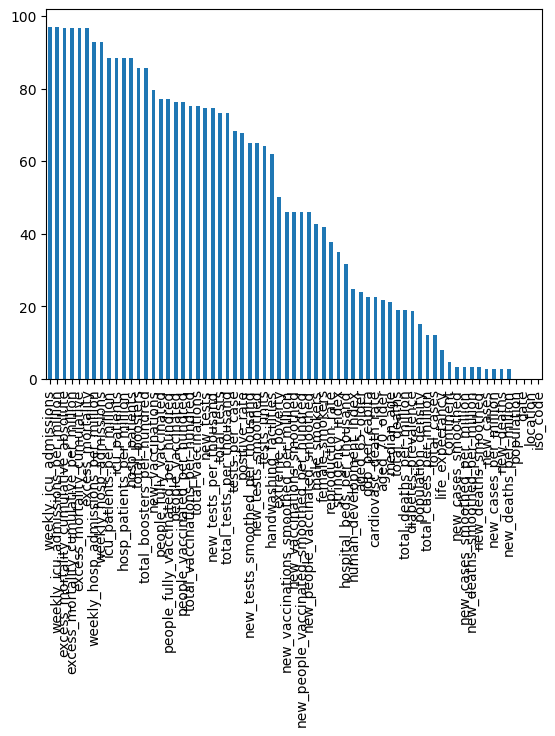

In [ ]:
missing_percent.plot(kind = 'bar')

In [ ]:
important_column =['excess_mortality','total_vaccinations_per_hundred', 'hospital_beds_per_thousand', 'handwashing_facilities', 'gdp_per_capita', 'extreme_poverty', 'female_smokers', 
               'male_smokers', 'cardiovasc_death_rate', 'diabetes_prevalence', 'weekly_icu_admissions']
important = missing_percent[important_column]
important

excess_mortality                  96.564979
total_vaccinations_per_hundred    75.285018
hospital_beds_per_thousand        31.608923
handwashing_facilities            62.058589
gdp_per_capita                    22.664068
extreme_poverty                   50.189002
female_smokers                    41.883354
male_smokers                      42.674368
cardiovasc_death_rate             22.523369
diabetes_prevalence               18.577386
weekly_icu_admissions             96.989097
dtype: float64

<Axes: >

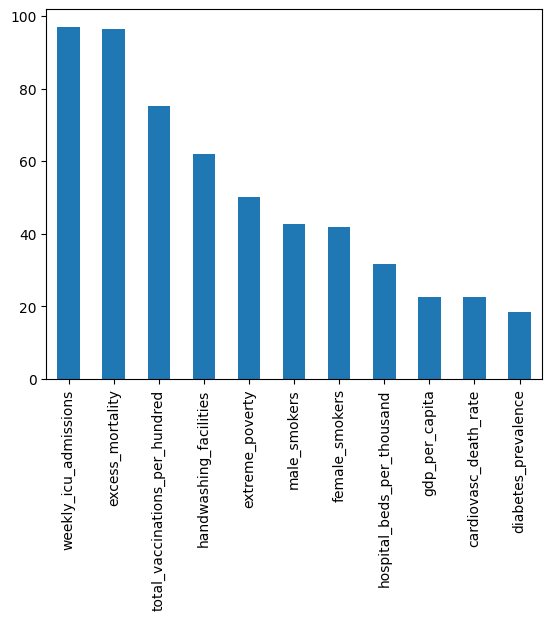

In [ ]:
important.sort_values(ascending=False).plot(kind = 'bar')

<Axes: xlabel='location'>

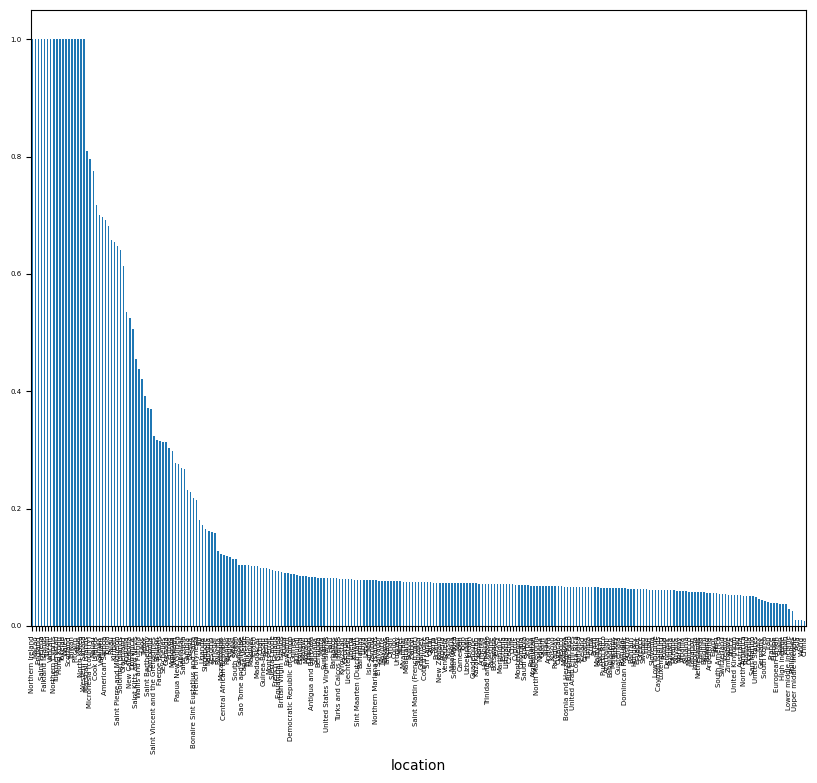

In [ ]:
na_by_country = df.isna()
na_by_country['location'] = df['location']
missing_country = na_by_country.groupby('location').mean()['total_deaths_per_million']
missing_country.sort_values(ascending= False ).plot(kind = 'bar', fontsize=5, figsize = (10,8))

#drop 1.0 

In [ ]:
not_missing_country = missing_country[missing_country!=1].index
not_missing_country

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=237)

<Axes: xlabel='location'>

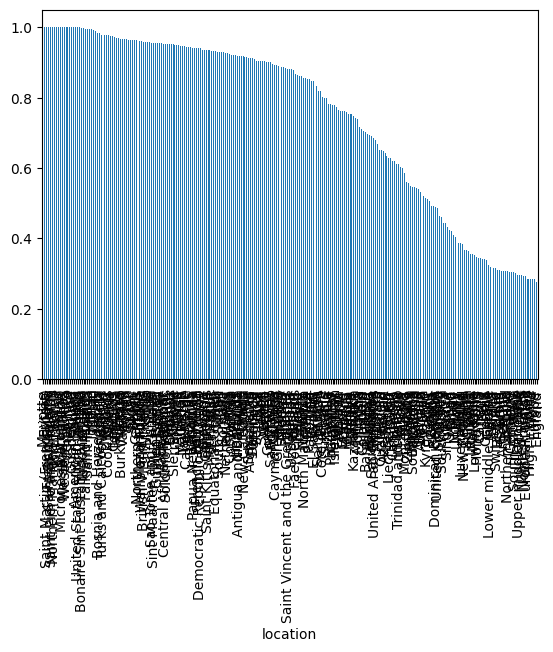

In [ ]:
na_by_country = df.isna()
na_by_country['location'] = df['location']
missing_country_va = na_by_country.groupby('location').mean()['total_vaccinations_per_hundred']
missing_country_va.sort_values(ascending= False ).plot(kind = 'bar')

#drop 1.0 

In [ ]:
def find_valid_country(column):
  na_by_country = df.isna()
  na_by_country['location'] = df['location']
  missing_country_va = na_by_country.groupby('location').mean()[column]
  missing_country_va.sort_values(ascending= False ).plot(kind = 'bar', fontsize=5, figsize = (10,8))
  not_missing_country = missing_country_va[(missing_country_va!=1)].index
  
  return missing_country_va

#drop 1.0 

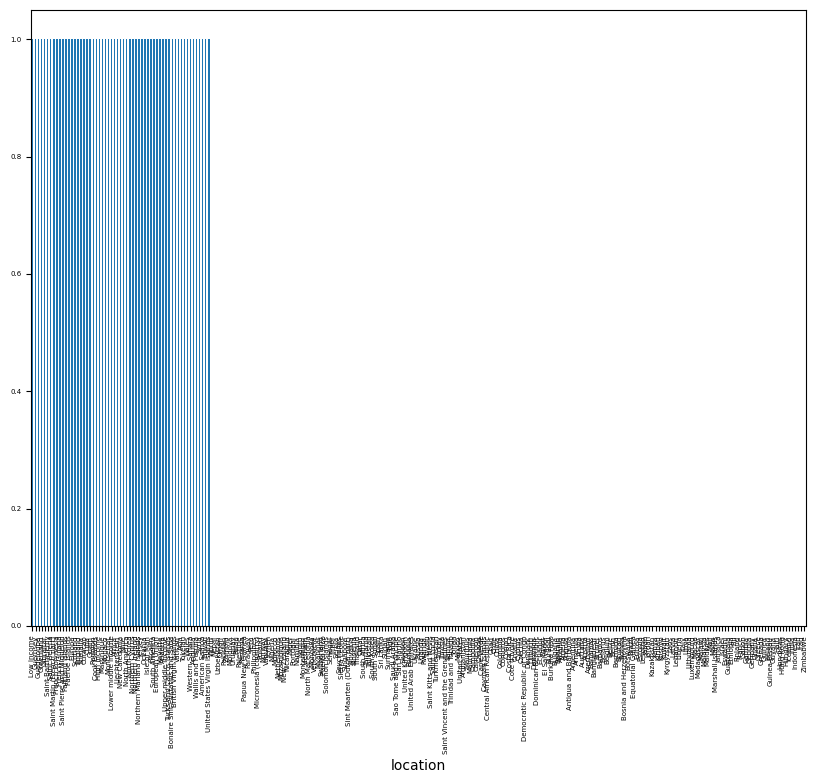

In [ ]:
gdp_nonmiss = find_valid_country('gdp_per_capita')

In [ ]:
not_missing_country = missing_country[(missing_country_va!=1) & (missing_country!=1) & (gdp_nonmiss!=1)].index
not_missing_country

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=187)

In [ ]:
df_unmiss =df[df['location'].apply(lambda x: x  in list(not_missing_country))] 
df_unmiss

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297082,ZWE,Africa,Zimbabwe,2023-03-17,264391.0,0.0,5.571,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297083,ZWE,Africa,Zimbabwe,2023-03-18,264391.0,0.0,2.714,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297084,ZWE,Africa,Zimbabwe,2023-03-19,264391.0,0.0,0.857,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
297085,ZWE,Africa,Zimbabwe,2023-03-20,264391.0,0.0,0.000,5672.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


<Axes: >

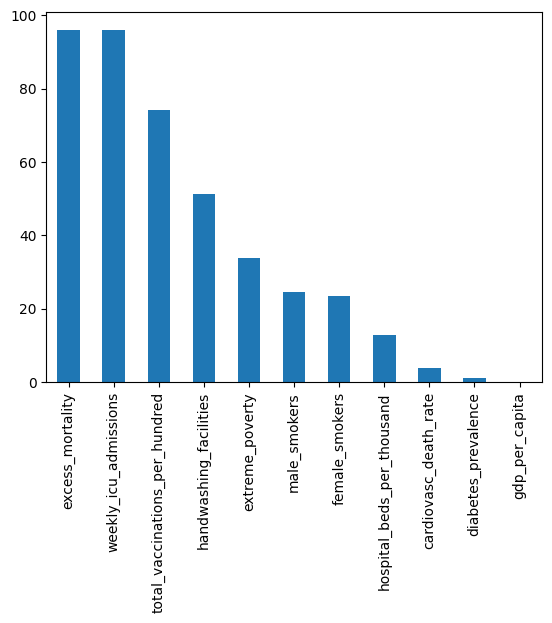

In [ ]:
missing_percent = df_unmiss.isna().sum()/df_unmiss.shape[0] *100
missing_percent = missing_percent.sort_values(ascending=False)
important = missing_percent[important_column]
important.sort_values(ascending=False).plot(kind = 'bar')

In [ ]:
colmns = df_unmiss.columns[2:]
colmns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 

In [ ]:
#features = ['location', 'total_vaccinations_per_hundred', 'hospital_beds_per_thousand', 'gdp_per_capita', 'total_deaths_per_million',	'life_expectancy'	,'human_development_index']
features = colmns
each_country = df_unmiss[features].groupby('location').mean()
each_country

<ipython-input-18-cc742ec4aad8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  each_country = df_unmiss[features].groupby('location').mean()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.180510e+05,178.899403,179.560649,5.040846e+03,6.712947,6.741666,2870.278311,4.349750,4.365813,122.562512,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
Albania,1.702807e+05,284.264055,285.458633,2.281929e+03,3.067291,3.079838,59909.101174,100.011355,100.431626,802.840698,...,51.200,NaN,2.890,78.57,0.795,2.842318e+06,9533.688224,22.620000,24.274722,3347.216203
Algeria,1.658278e+05,231.296422,232.284501,4.573222e+03,5.861158,5.886238,3693.002879,5.150995,5.172991,101.846215,...,30.400,83.741,1.900,76.88,0.748,4.490323e+07,17502.275006,11.425833,27.177500,402.798696
Angola,5.635686e+04,89.691652,90.075294,1.209773e+03,1.646508,1.653577,1583.547419,2.520212,2.530967,33.992841,...,NaN,26.664,NaN,61.15,0.581,3.558900e+07,NaN,NaN,NaN,NaN
Antigua and Barbuda,4.000588e+03,7.769821,7.801261,7.603807e+01,0.124361,0.124930,42662.927361,82.858617,83.193759,810.882372,...,NaN,NaN,3.800,77.02,0.778,9.377200e+04,-37.433334,-5.079167,-4.339583,-402.228375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,3.855374e+06,9818.687394,9860.654528,2.556896e+04,36.846547,37.004299,39265.680352,100.000014,100.427417,260.411166,...,45.900,85.847,2.600,75.40,0.704,9.818686e+07,NaN,NaN,NaN,NaN
World,2.822149e+08,648292.163543,650858.121464,3.861689e+06,5862.606474,5886.194553,35386.982458,81.289488,81.611230,484.217959,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
Yemen,7.447805e+03,10.174617,10.218134,1.459315e+03,1.839012,1.846917,221.025374,0.301944,0.303224,43.307495,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN


In [ ]:
scaler = MinMaxScaler()
scaler.fit(each_country)
scaled = scaler.fit_transform(each_country)
each_country = pd.DataFrame(scaled, columns=each_country.columns)
each_country

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0.000408,0.000269,0.000269,0.001305,0.001145,0.001145,0.009467,0.006495,0.006502,0.026639,...,NaN,0.373762,0.030888,0.364468,0.207815,0.005156,NaN,NaN,NaN,NaN
1,0.000593,0.000432,0.000432,0.000591,0.000523,0.000523,0.213282,0.159988,0.160243,0.175377,...,0.617898,NaN,0.215444,0.798044,0.712256,0.000355,0.020229,0.586842,0.530628,0.721968
2,0.000578,0.000350,0.000350,0.001184,0.001000,0.001000,0.012406,0.007781,0.007793,0.022110,...,0.322443,0.844005,0.138996,0.744714,0.628774,0.005629,0.031749,0.404495,0.580790,0.233690
3,0.000190,0.000132,0.000132,0.000313,0.000281,0.000281,0.004869,0.003559,0.003565,0.007274,...,NaN,0.260462,NaN,0.248343,0.332149,0.004461,NaN,NaN,NaN,NaN
4,0.000004,0.000005,0.000005,0.000019,0.000021,0.000021,0.151657,0.132466,0.132656,0.177135,...,NaN,NaN,0.285714,0.749132,0.682060,0.000010,0.006392,0.135637,0.036153,0.100191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.013651,0.015139,0.015144,0.006621,0.006285,0.006286,0.139518,0.159970,0.160236,0.056779,...,0.542614,0.865537,0.193050,0.698012,0.550622,0.012310,NaN,NaN,NaN,NaN
183,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125658,0.129948,0.130123,0.105712,...,0.382599,0.602611,0.201158,0.609025,0.609236,1.000000,NaN,NaN,NaN,NaN
184,0.000016,0.000009,0.000009,0.000378,0.000314,0.000314,0.000000,0.000000,0.000000,0.009310,...,0.305398,0.494362,0.046332,0.405175,0.134991,0.004224,NaN,NaN,NaN,NaN
185,0.000635,0.000444,0.000445,0.000640,0.000589,0.000589,0.031678,0.022951,0.022990,0.026839,...,0.241477,0.130353,0.146718,0.334806,0.337478,0.002508,NaN,NaN,NaN,NaN


In [ ]:
# remove the features that is 
relevats = ['new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'icu_patients',
 'hosp_patients',
 'weekly_icu_admissions']

non_medical_features=[]
all_features = [
 'total_cases_per_million',
 'new_cases_smoothed_per_million',
 'reproduction_rate',
 'total_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population']
all_features

['total_cases_per_million',
 'new_cases_smoothed_per_million',
 'reproduction_rate',
 'total_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population']

In [ ]:
y = each_country[all_features]
y.isna().sum()

total_cases_per_million                        0
new_cases_smoothed_per_million                 0
reproduction_rate                              4
total_tests_per_thousand                      20
new_tests_smoothed_per_thousand               22
positive_rate                                 28
tests_per_case                                29
total_vaccinations_per_hundred                 0
people_vaccinated_per_hundred                  0
people_fully_vaccinated_per_hundred            0
total_boosters_per_hundred                    14
new_vaccinations_smoothed_per_million          0
new_people_vaccinated_smoothed_per_hundred     0
stringency_index                              17
population_density                             1
median_age                                     8
aged_65_older                                  8
aged_70_older                                  9
gdp_per_capita                                 0
cardiovasc_death_rate                          7
diabetes_prevalence 

In [ ]:
# previous try [ 'total_vaccinations_per_hundred',  'gdp_per_capita','hospital_beds_per_thousand',	'life_expectancy'	,'human_development_index']
lireg1 = sm.OLS(endog=each_country['total_deaths_per_million'], exog=sm.add_constant(each_country[all_features]), missing='drop')
results = lireg1.fit()

#second model (每年，全部的features，国家selected on missing values)

In [ ]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.666
Model:                                  OLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     7.262
Date:                      Tue, 16 May 2023   Prob (F-statistic):           8.21e-13
Time:                              20:01:17   Log-Likelihood:                 97.775
No. Observations:                       117   AIC:                            -143.5
Df Residuals:                            91   BIC:                            -71.73
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
print(results.params)

const                                        -0.012058
total_cases_per_million                       1.326296
new_cases_smoothed_per_million               -1.142662
reproduction_rate                             0.091329
total_tests_per_thousand                      0.077439
new_tests_smoothed_per_thousand              -0.060029
positive_rate                                 0.098027
tests_per_case                               -0.113471
total_vaccinations_per_hundred                0.015982
people_vaccinated_per_hundred                 0.065858
people_fully_vaccinated_per_hundred          -0.226100
total_boosters_per_hundred                    0.218702
new_vaccinations_smoothed_per_million        -0.109685
new_people_vaccinated_smoothed_per_hundred   -0.055750
stringency_index                              0.066118
population_density                           -1.185385
median_age                                    0.454523
aged_65_older                                -0.208100
aged_70_ol

In [ ]:
droppped = ['reproduction_rate',
 'total_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index','aged_65_older',
 'aged_70_older',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population'
 ]
reviewed_features = [

 'total_cases_per_million',
 'new_cases_smoothed_per_million',
 'population_density',
 'median_age',
'gdp_per_capita'
 ]

In [ ]:
# previous try [ 'total_vaccinations_per_hundred',  'gdp_per_capita','hospital_beds_per_thousand',	'life_expectancy'	,'human_development_index']
lireg2 = sm.OLS(endog=each_country['total_deaths_per_million'], exog=sm.add_constant(each_country[reviewed_features]), missing='drop')
results = lireg2.fit()

#2.5 model  
#select features based on the second model. R-squared is 0.614, which is less than....because it has fewer features, which prevents overfitting problem. 
#coefficients 被挑选出来，更加客观；population, median age, gdp_per_capita是以年为单位变动的, 所以？

In [ ]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.614
Model:                                  OLS   Adj. R-squared:                  0.603
Method:                       Least Squares   F-statistic:                     54.77
Date:                      Tue, 16 May 2023   Prob (F-statistic):           7.95e-34
Time:                              20:01:18   Log-Likelihood:                 140.24
No. Observations:                       178   AIC:                            -268.5
Df Residuals:                           172   BIC:                            -249.4
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['monthly'] = df['date'].dt.strftime('%Y-%m')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,monthly
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297082,ZWE,Africa,Zimbabwe,2023-03-17,264391.0,0.0,5.571,5672.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023-03
297083,ZWE,Africa,Zimbabwe,2023-03-18,264391.0,0.0,2.714,5672.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023-03
297084,ZWE,Africa,Zimbabwe,2023-03-19,264391.0,0.0,0.857,5672.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023-03
297085,ZWE,Africa,Zimbabwe,2023-03-20,264391.0,0.0,0.000,5672.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023-03


In [ ]:
each_country_month = df.groupby(['monthly','location'],as_index =False).mean()
each_country_month

<ipython-input-29-4aa708684db2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  each_country_month = df.groupby(['monthly','location'],as_index =False).mean()


,monthly,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01,Afghanistan,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,2020-01,Africa,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,2020-01,Albania,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,51.200,NaN,2.890,78.57,0.795,2.842318e+06,-247.2,-10.16,-10.16,-86.227040
3,2020-01,Algeria,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,30.400,83.741,1.900,76.88,0.748,4.490323e+07,-438.9,-2.49,-2.49,-10.100878
4,2020-01,American Samoa,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,2023-03,Wallis and Futuna,3.427000e+03,0.000000,0.000000,7.000000e+00,0.000000,0.000000,295532.942000,0.000000,...,NaN,NaN,NaN,79.94,NaN,1.159600e+04,NaN,NaN,NaN,NaN
9866,2023-03,World,7.599945e+08,121201.142857,131048.306190,6.872280e+06,828.809524,903.136143,95295.859667,15.197429,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
9867,2023-03,Yemen,1.194500e+04,0.000000,0.000000,2.159000e+03,0.000000,0.000000,354.487000,0.000000,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN
9868,2023-03,Zambia,3.431412e+05,14.095238,22.496762,4.057000e+03,0.000000,0.102143,17141.914286,0.704143,...,24.700,13.938,2.000,63.89,0.584,2.001767e+07,NaN,NaN,NaN,NaN


In [ ]:
not_missinge_half = each_country_month[all_features].isna().mean()[each_country_month[all_features].isna().mean()<0.5]
not_missinge_half 

total_cases_per_million                       0.109524
new_cases_smoothed_per_million                0.027964
reproduction_rate                             0.356434
total_vaccinations_per_hundred                0.483181
people_vaccinated_per_hundred                 0.493110
new_vaccinations_smoothed_per_million         0.441337
new_people_vaccinated_smoothed_per_hundred    0.441439
stringency_index                              0.344478
population_density                            0.151773
median_age                                    0.210942
aged_65_older                                 0.238703
aged_70_older                                 0.218845
gdp_per_capita                                0.226849
cardiovasc_death_rate                         0.225532
diabetes_prevalence                           0.186018
hospital_beds_per_thousand                    0.316413
life_expectancy                               0.080547
human_development_index                       0.249240
population

In [ ]:
lireg3 = sm.OLS(endog=each_country_month['total_deaths_per_million'], exog=sm.add_constant(each_country_month[not_missinge_half.index]), missing='drop')
results = lireg3.fit()

#3.5 model, 每个月，features也是选的（把missing太多的drop了，50%以下drop了，total都drop了，total_per_million留下），国家也是selected based on missing values; drop这些features导致我们model的performance improve了
#relatively better

In [ ]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.473
Model:                                  OLS   Adj. R-squared:                  0.469
Method:                       Least Squares   F-statistic:                     137.6
Date:                      Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                              20:03:44   Log-Likelihood:                -23785.
No. Observations:                      2937   AIC:                         4.761e+04
Df Residuals:                          2917   BIC:                         4.773e+04
Df Model:                                19                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
lireg4 = sm.OLS(endog=each_country_month['total_deaths_per_million'], exog=sm.add_constant(each_country_month[all_features]), missing='drop')
results = lireg4.fit()
print(results.summary())

#third model
#每个月, all_features, countries selected on missing values

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.420
Model:                                  OLS   Adj. R-squared:                  0.401
Method:                       Least Squares   F-statistic:                     21.99
Date:                      Tue, 16 May 2023   Prob (F-statistic):           3.32e-73
Time:                              20:04:01   Log-Likelihood:                -6392.0
No. Observations:                       784   AIC:                         1.284e+04
Df Residuals:                           758   BIC:                         1.296e+04
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
choosen_countries = [ 'Austria', 'Belgium',
'Bulgaria', 'Chile', 'Canada', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Israel',
'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea', 'Slovenia',
'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

In [ ]:
select_countries = each_country_month[each_country_month['location'].apply(lambda x: x in choosen_countries)]
select_countries.isna().mean()

monthly                                    0.000000
location                                   0.000000
total_cases                                0.025641
new_cases                                  0.000000
new_cases_smoothed                         0.000000
                                             ...   
population                                 0.000000
excess_mortality_cumulative_absolute       0.038073
excess_mortality_cumulative                0.038073
excess_mortality                           0.038073
excess_mortality_cumulative_per_million    0.038073
Length: 64, dtype: float64

In [ ]:
lireg5 = sm.OLS(endog=select_countries['total_deaths_per_million'], exog=sm.add_constant(select_countries[all_features]), missing='drop')
results = lireg5.fit()
print(results.summary())
#fourth model
#每个月, all_features, paper里选的33个国家
#relatively better

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.642
Model:                                  OLS   Adj. R-squared:                  0.617
Method:                       Least Squares   F-statistic:                     25.47
Date:                      Tue, 16 May 2023   Prob (F-statistic):           3.26e-64
Time:                              20:04:06   Log-Likelihood:                -3002.7
No. Observations:                       381   AIC:                             6057.
Df Residuals:                           355   BIC:                             6160.
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
features = ['location', 'total_vaccinations_per_hundred', 'hospital_beds_per_thousand', 'gdp_per_capita', 'total_deaths_per_million','hospital_beds_per_thousand',	'life_expectancy'	,'human_development_index']
each_country = df_unmiss[features].groupby('location').mean()
each_country

,total_vaccinations_per_hundred,hospital_beds_per_thousand,gdp_per_capita,total_deaths_per_million,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,
Afghanistan,17.020686,0.500,1803.987,122.562512,0.500,64.83,0.511
Albania,48.475108,2.890,11803.431,802.840698,2.890,78.57,0.795
Algeria,23.733929,1.900,13913.839,101.846215,1.900,76.88,0.748
Angola,31.267742,NaN,5819.495,33.992841,NaN,61.15,0.581
Antigua and Barbuda,83.997789,3.800,21490.943,810.882372,3.800,77.02,0.778
...,...,...,...,...,...,...,...
Vietnam,102.805293,2.600,6171.884,260.411166,2.600,75.40,0.704
World,100.442017,2.705,15469.207,484.217959,2.705,72.58,0.737
Yemen,2.158780,0.700,1479.147,43.307495,0.700,66.12,0.470


### Data for graphing:

In [ ]:
fill_death = df_unmiss.copy()

In [ ]:
# result of just with backward fill
fill_death['total_deaths_per_million'].bfill()

0           0.024
1           0.024
2           0.024
3           0.024
4           0.024
           ...   
297082    347.538
297083    347.538
297084    347.538
297085    347.538
297086    347.538
Name: total_deaths_per_million, Length: 219619, dtype: float64

In [ ]:
date_with_y = df_unmiss[['date']].copy()
date_with_y['total_deaths_per_million_isna'] = df_unmiss['total_deaths_per_million'].isna()
date_with_y

,date,total_deaths_per_million_isna
0,2020-01-03,True
1,2020-01-04,True
2,2020-01-05,True
3,2020-01-06,True
4,2020-01-07,True
...,...,...
297082,2023-03-17,False
297083,2023-03-18,False
297084,2023-03-19,False
297085,2023-03-20,False


In [ ]:
# prove at least the last day of the country is not nan
date_with_y.groupby('date', dropna=False).sum()

,total_deaths_per_million_isna
date,
2020-01-01,2
2020-01-02,2
2020-01-03,187
2020-01-04,187
2020-01-05,187
...,...
2023-03-20,0
2023-03-21,0
2023-03-22,33


Based on the previous result, that means there is a risk for using the forwar fill ot backward fill. So we decide to use groupby and use linear fill.

In [ ]:
# fill all the nans based on the country and date. Fill the nans first with linear regression then with backward fill and forward fill
no_na =fill_death.groupby('location').transform(lambda x: x.interpolate().bfill().ffill())

In [ ]:
fill_death['total_deaths_per_million'].isna().sum().sum()

25189

In [ ]:
no_na['location'] = fill_death.location
no_na

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,location
0,AFG,Asia,2020-01-03,5.0,0.0,0.000,1.0,0.0,0.0,0.122,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan
1,AFG,Asia,2020-01-04,5.0,0.0,0.000,1.0,0.0,0.0,0.122,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan
2,AFG,Asia,2020-01-05,5.0,0.0,0.000,1.0,0.0,0.0,0.122,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan
3,AFG,Asia,2020-01-06,5.0,0.0,0.000,1.0,0.0,0.0,0.122,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan
4,AFG,Asia,2020-01-07,5.0,0.0,0.000,1.0,0.0,0.0,0.122,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297082,ZWE,Africa,2023-03-17,264391.0,0.0,5.571,5672.0,0.0,0.0,16199.894,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,Zimbabwe
297083,ZWE,Africa,2023-03-18,264391.0,0.0,2.714,5672.0,0.0,0.0,16199.894,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,Zimbabwe
297084,ZWE,Africa,2023-03-19,264391.0,0.0,0.857,5672.0,0.0,0.0,16199.894,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,Zimbabwe
297085,ZWE,Africa,2023-03-20,264391.0,0.0,0.000,5672.0,0.0,0.0,16199.894,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,Zimbabwe


In [ ]:
#no_na.to_excel('no_na.xlsx')